In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Changing directory to top folder (All programs run from top)
import os
os.chdir('/Users/nschumacher/docs/galvanize/smunch-user-food-analysis')

%matplotlib inline  
%config InlineBackend.figure_format='retina'

In [6]:
## Reading in noah tables
orders_base = pd.read_csv('run1/data/orders.csv', index_col=0)
meal_ingrds_base = pd.read_csv('run1/data/meal_ingrds.csv', index_col=0)
ingrds_base = pd.read_csv('run1/data/ingrds.csv', index_col=0)

In [7]:
orders = orders_base
meal_ingrds = meal_ingrds_base
ingrds = ingrds_base

In [8]:
orders.sample(2)

,cust_id,meal_id,meal_name
174832,0030N00002f7CHKQA2,a050N00000zZg4UQAS,Grilled Chicken 'Schaschlik' on Vegetable Rice
140187,0030N00002LQqB8QAL,a050N00000zZg8kQAC,Beef Kebab Platter


In [9]:
meal_ingrds.sample(2)

,meal_id,ingredient_id
13405,NaN,a060N00002XMfUXQA1
6996,NaN,a060N00002XMfVwQAL


In [10]:
len(meal_ingrds.meal_id.unique())

980

In [11]:
ingrds.sample(2)

,ingredient_id,name
1098,a060N00002XMfcOQAT,Potatoes
859,a060N00002aZzlOQAS,Sweet Peas


In [12]:
ingrds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1413
Data columns (total 2 columns):
ingredient_id    1414 non-null object
name             1414 non-null object
dtypes: object(2)
memory usage: 33.1+ KB


In [13]:
## Getting the ingredient ids
ig_ids = ingrds.ingredient_id.values

## Get the tot count of orders for every user
cust_order_count = pd.DataFrame(orders.groupby('cust_id')['meal_id'].count())
cust_order_count.columns = ['meal_count']
cust_order_count.sample(3)

,meal_count
cust_id,
0030N00002VU6G2QAL,31
0030N00002eWRjAQAW,32
0030N00002VVSwpQAH,12


In [14]:
cust_order_count.meal_count.sum()

254663

In [15]:
cust_order_count.describe()

,meal_count
count,9761.000000
mean,26.089847
std,39.892897
min,1.000000
25%,3.000000
50%,11.000000
75%,31.000000
max,447.000000


In [16]:
meal_c = cust_order_count.meal_count.values
tot_p = 0
for i in range(1,3):
    c = (meal_c == i).sum()
    percent = c / len(meal_c)
    tot_p += percent
    print("{2:5.2f}% of customer have ordered {1:2d} times. (count = {0:4d})".format(c, i, percent*100))
print("Make up {0:2.2f}% of total user base.".format(tot_p*100))

14.41% of customer have ordered  1 times. (count = 1407)
 7.55% of customer have ordered  2 times. (count =  737)
Make up 21.96% of total user base.


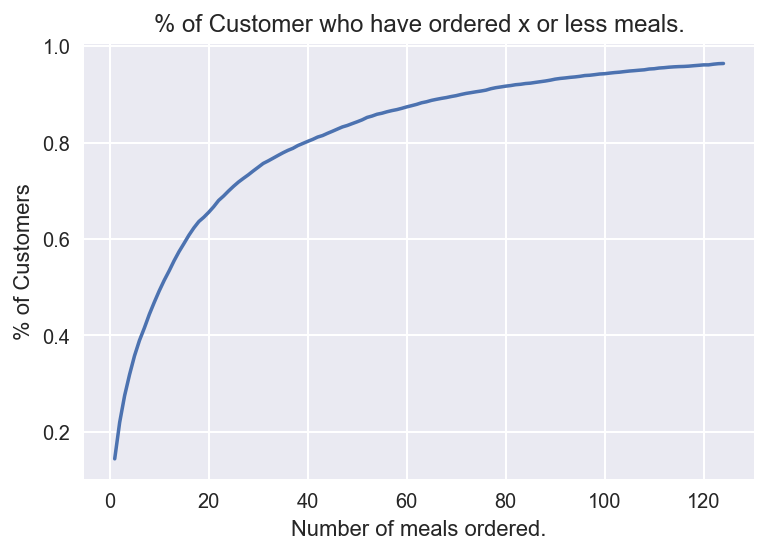

In [17]:
## Plot % ordered
tot_p = []
for i in range(1,125):
    percent = (meal_c <= i).sum() / len(meal_c)
    tot_p.append(percent)
    
plt.plot(np.arange(1,125), tot_p)
plt.title("% of Customer who have ordered x or less meals.")
plt.xlabel("Number of meals ordered.")
plt.ylabel("% of Customers")
plt.minorticks_on()
plt.show()

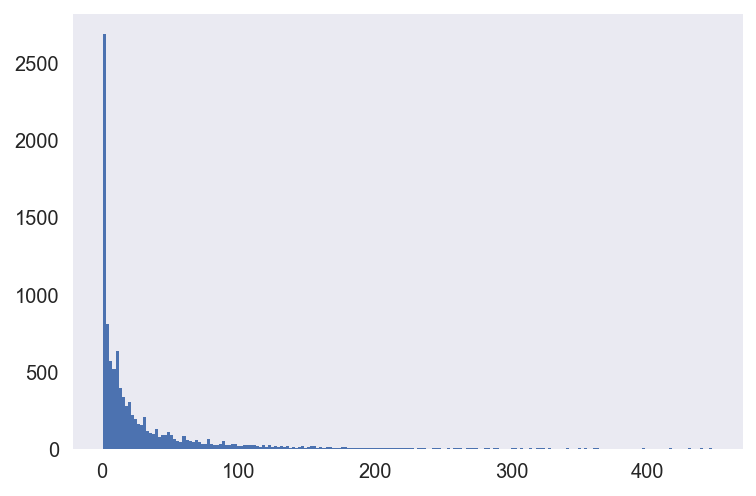

In [18]:
## Inspecting the breakdown of user order count
counts = cust_order_count.meal_count.values
plt.hist(counts, bins=200)
#plt.xlim(0)
plt.grid()
plt.minorticks_on()
plt.show()

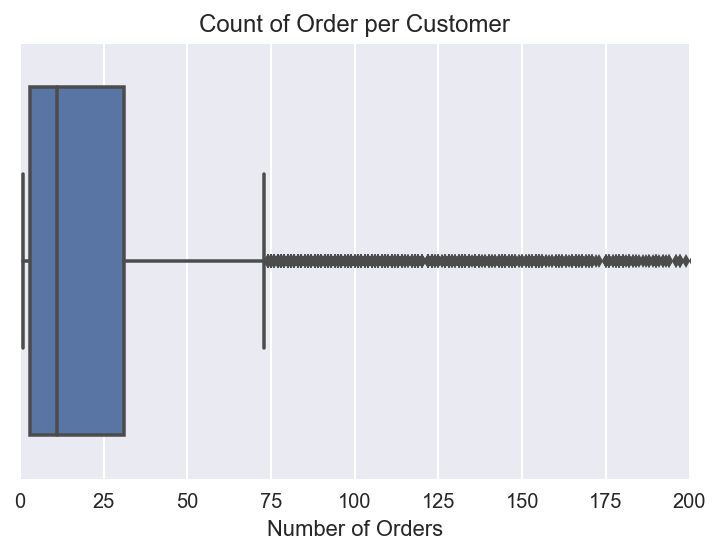

In [19]:
## Box plot of number of orders per customer
sns.boxplot(counts)
plt.xlim(0,200)
plt.xlabel('Number of Orders')
plt.title("Count of Order per Customer")

In [20]:
## Creating orders dataframe with userid and list of meals ordered
orders_grouped = pd.DataFrame(orders.groupby('cust_id')['meal_id'].apply(list))
orders_grouped.columns = ['meals_ordered']


## Grouping table for the meal ingredients
meal_ingrds_grouped = pd.DataFrame(meal_ingrds.groupby('meal_id')['ingredient_id'].apply(list))
meal_ingrds_grouped.columns = ['ingredients']
meal_ingrds_grouped.head(2)

,ingredients
meal_id,
a050N00000zZfy5QAC,"[a060N00002XMfYIQA1, a060N00002XMfZOQA1, a060N..."
a050N00000zZfy6QAC,"[a060N00002XMfTnQAL, a060N00002XMfW7QAL, a060N..."


In [21]:
orders_grouped.head(2)

,meals_ordered
cust_id,
0030N00002I6CDNQA3,"[a050N000010YKw5QAG, a050N00000zZg5EQAS, a050N..."
0030N00002LQoyvQAD,"[a050N00000zbGG2QAM, a050N000010W5fAQAS, a050N..."


In [22]:
ingrds.sample(2)

,ingredient_id,name
869,a060N00002ZoQ4NQAV,"black beans, red onion, salt, pepper, coriander"
1027,a060N00002dzCIkQAM,lenses


In [23]:
## Trying to get table with cust_id | ingredients_list
#cust_ing = orders_grouped.meals_ordered.apply(lambda x: [meal_ingrds_grouped.loc[i].values[0] for i in x])

In [24]:
## Getting frequency for one user...
cust_meals = orders_grouped.loc['0030N00002LQqfCQAT'].values[0]
cust_meals

ingr_dic = {}
for meal in cust_meals:
    ingrs = meal_ingrds_grouped.loc[meal].values[0]
    
    for ing in ingrs:
        name = ingrds.loc[ingrds.ingredient_id == ing, :].name.values[0].lower()
        if name in ingr_dic:
            ingr_dic[name] += 1
        else:
            ingr_dic[name] = 1

print(ingr_dic)

{'green bell pepper': 3, 'tomatoes': 13, 'rice': 13, 'parsley': 32, 'tomato sauce': 6, 'pepper sauce': 1, 'mint': 13, 'dill': 6, 'onion': 4, 'olive oil': 25, 'potatoes': 18, 'feta cheese': 6, 'yoghurt (dairy)': 7, 'onions': 23, 'zucchini': 20, 'tomato': 33, 'hummus (chickpea)': 9, 'cauliflower': 8, 'paprika': 8, 'halloumi (goats cheese)': 2, 'falafel (chickpeas)': 10, 'arabic pita bread (flour)': 6, 'batata harra (potato-coriander-chilli-pomegranate-apple-garlic-lemon)': 2, 'sesame yoghurt dressing (sesame yoghurt - chili - pomegranat)': 2, 'sesame': 15, 'wheat bread': 1, 'cheese': 12, 'beef': 4, 'bacon (pork)': 1, 'lettuce': 7, 'mayonnaise': 6, 'pickles': 1, 'tomato ketchup': 2, 'bbq sauce (ketchup - onion - brown sugar)': 1, 'coriander': 22, 'ginger': 7, 'minced beef': 1, 'sugar': 15, 'garlic': 30, 'pine nuts': 7, 'lemon': 22, 'cumin': 9, 'chili': 15, 'oregano': 13, 'nutmeg': 5, 'bulgur': 7, 'basil': 4, 'red cabbage': 5, 'cayenne': 5, 'white cabbage': 5, 'carrots': 5, 'chicken': 6, '

* The bellow indicates that some ingredients that are the same have multiple unique ingredient ID's that are used.
* The counts of the duplicates is strong enough to factor into the frequency and needs to be accounted for.
* For now will not worry about this and will only use the top x ingredients.

In [25]:
ings = []
freq = []
for key in ingr_dic:
    ings.append(key)
    count = ingr_dic[key]
    freq.append(count/len(cust_meals))

args = np.argsort(ings)
for ar in args:
    print(ings[ar], freq[ar])

almonds 0.078125
apple vinegar 0.015625
arabic pita bread (flour) 0.09375
aubergine 0.03125
avocado 0.109375
baby spinach 0.046875
bacon (pork) 0.015625
balsamic vinegar 0.015625
basil 0.0625
batata harra (potato-coriander-chilli-pomegranate-apple-garlic-lemon) 0.03125
bay leaves 0.015625
bbq sauce (ketchup - onion - brown sugar) 0.015625
beef 0.0625
beetroot 0.03125
bell pepper 0.203125
bell peppers 0.015625
bio egg 0.046875
black beans 0.140625
black cumin 0.015625
breadcrumb flour 0.015625
breadcrumbs 0.03125
brioche bun (flour, milk, yeast, egg) 0.015625
broccoli 0.125
brownie (sugar, flour, flaxseeds, canola oil, cacao, vanilla, baking powder) 0.015625
bulghur tabbouleh 0.046875
bulgur 0.109375
bulgur salad(spinach-chickpea-bulgur-tomato-cucumber-mint-lemon-olive oil-sesam) 0.015625
butter 0.078125
butter beans 0.015625
buttermilk 0.015625
cabbage 0.03125
capers 0.015625
carrot 0.296875
carrots 0.078125
cashew nuts 0.0625
cashews 0.078125
cauliflower 0.125
cayenne 0.078125
celeria